In [4]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
from time import sleep

import numpy as np
import gym
from gym.envs.registration import register
from stable_baselines3 import *
from stable_baselines3.common.env_util import make_vec_env
import wandb
from wandb.integration.sb3 import WandbCallback

from gsnake.env import GoogleSnakeEnv
from gsnake.configs import GoogleSnakeConfig
# register(
#     id='GoogleSnake-v1',
#     entry_point=GoogleSnakeEnv,
#     max_episode_steps=500,
# )

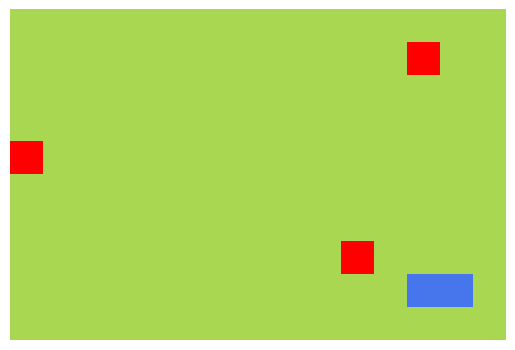

Terminated


In [11]:
model = PPO.load("./PPO_MLP_time_nch_10M.pt")
config = GoogleSnakeConfig(
    # reward_mode='basic',
    multi_channel=True,
    reward_mode='time_constrained',
    reward_scale=1,
    n_foods=3
)
env = GoogleSnakeEnv(config, 42, 'tui')
obs = env.reset()
img = env.render()
done = False
try:
    while True:
        action, _states = model.predict(obs)
        obs, reward, done, info = env.step(action)
        if done:
            obs = env.reset()
            continue
        print(reward)
        clear_output(wait=True)
        plt.axis('off')
        plt.imshow(env.render())
        plt.show()
        sleep(0.2)
except KeyboardInterrupt:
    print('Terminated')
finally:
    env.close()